# K-Means example: step-by-step

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University


This example manually walks through the iterations of k-means on a small toy problem with 20 data points. Tricks to speed up computations (like the binomial trick mentioned in class) are omitted here for simplicity. 

### Imports, etc.

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import matplotlib as mpl
import seaborn as sns

from sklearn.datasets import make_blobs

In [ ]:
sns.set_style('white')
np.set_printoptions(precision=1, suppress=True)

# Define a utility function to plot cluster centers

This function plots the current data points, clusters, and assignments

In [ ]:
def plot_clusters(X, centers, assignments, title=None):
    figure(figsize=(9,6))
    scatter(X[:,0], X[:,1], c=assignments, s=60, alpha=0.7, lw=1, edgecolors='k')
    if centers is not None:
        scatter(centers[:,0], centers[:,1], s=140, c='orange')
    xlabel('$x_1$')
    ylabel('$x_2$')
    if title is not None:
        plt.title(title)
    show()


# Generate some data

Here we generate $N=20$ data points. Each data point is a 2-dimensional vector. The data returned by `make_blobs` is a $20 \times 2$ matrix $X$ with **each row representing a data point**. The `make_blobs` function also returns a $y$ value that indicates which blob each value in $X$ belongs to. Here we ignore it.

In [ ]:
X, _ = make_blobs(n_samples=20, random_state=1)

# N is 20 here (20 vectors), and M is 2 (2 dimensional)
N, M = X.shape

In [ ]:
print(X)

[[ -7.8  -9. ]
 [ -7.7  -8.2]
 [ -0.8   2.1]
 [-10.2  -4.8]
 [-11.1  -2.8]
 [ -9.1  -3.5]
 [ -7.3  -9. ]
 [ -9.1  -4.6]
 [  0.1   3.6]
 [-10.1  -4.9]
 [ -2.    4. ]
 [ -0.2   2.3]
 [ -0.5   3.3]
 [ -7.8  -8.5]
 [ -5.4  -7.4]
 [-10.   -3.4]
 [ -2.2   3.3]
 [ -1.3   4.2]
 [-10.3  -3.4]
 [ -8.2  -7.9]]


Note that we are using 2D vectors just because we can plot the results, but the algorithm works in any number of dimensions.

Let's scatter plot the data to see what it looks like.

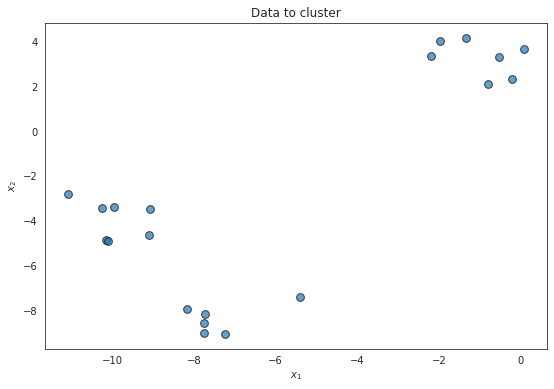

In [ ]:
plot_clusters(X, None, None, title='Data to cluster')

# K-Means initialization

Here we initialize the k-means algorithm. We do this by **selecting 3 random points** from our data points to be the initial cluster centers. 

In [ ]:
# seed rng for consistent results across runs
np.random.seed(31337)

# We will do k-means with k = 3
k = 3

# initialize k-means: pick 3 points at random to be the centers
indices = np.random.randint(0, N, k)
centers = X[indices, :]

Let's print the centers. This should be a $3\times 2$ matrix (3 centers, each of dimension 2)

In [ ]:
print(centers)

[[ -9.1  -4.6]
 [-10.   -3.4]
 [ -0.5   3.3]]


Let's see which points happened to be selected as the initial centers.

In [ ]:
print(indices)

[ 7 15 12]


Ok, it was the 8th (index 7), the 16th (index 15), and the 13th (index 12).

# Assignment step

Find distances to from each point to all of the initial cluster centers, then assign points to their nearest cluster center

### Compute distances
First up, compute the distances to each cluster center. We will store the distances in a $N\times k$ (in this case $20 \times 3$) matrix $D$ where $$D_{ij} = \|x_i - c_j\|^2$$ is the distance between point $i$ and cluster $j$. 

Note that we use the squared distance instead of the true Euclidean distance,but taking the square won't change which center is nearest, so this doesn't matter.

In [ ]:
D = np.zeros((N, k))

# for each cluster
for j in range(k):
    c = centers[j]

    # for each data point
    for i in range(N):

        # find the distance data point i to cluster j
        D[i, j] = np.sum((X[i] - c)**2) 

Print out the resulting $20 \times 3$ distance matrix $D$.

In [ ]:
print(D)

[[ 20.8  36.5 203.6]
 [ 14.3  27.9 183.6]
 [114.4 113.9   1.5]
 [  1.2   2.2 159.2]
 [  7.3   1.6 149.2]
 [  1.4   0.7 119.1]
 [ 22.8  39.4 197.8]
 [  0.    2.3 136.6]
 [152.9 150.    0.5]
 [  1.1   2.3 159.2]
 [125.6 118.2   2.6]
 [128.  127.9   1. ]
 [136.6 133.5   0. ]
 [ 17.1  31.7 192.9]
 [ 21.3  37.  138.7]
 [  2.3   0.  133.5]
 [111.3 105.3   2.8]
 [137.5 130.9   1.4]
 [  2.8   0.1 140.2]
 [ 11.6  23.8 184.6]]


### Compute assignments
From the above we see that the first point should be assigned to cluster 1, the second point to cluster 1, the third to cluster 3, etc. We can use the numpy `argmin` function along the second axis (index 1) to compute all the assignments simultaneously. `argmin` returns the index of the smallest element.

In [ ]:
# Assign each point to the nearest cluster center
# A[i] = index of cluster to which point i is assigned
A = np.argmin(D, axis=1)

Print out the assignments to verify they are as expected:

In [ ]:
print(A)

[0 0 2 0 1 1 0 0 2 0 2 2 2 0 0 1 2 2 1 0]


We see that, indeed, the first point is assigned to cluster 1 (index 0), the second to cluster 1 (index 0), the third to cluster 3 (index 2), etc.

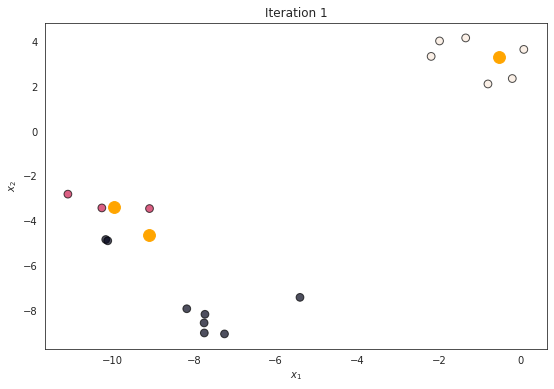

In [ ]:
plot_clusters(X, centers, A, title='Iteration 1')

# Update step
Move cluster centers to the middle (centroid) of points assigned to it. We do this by finding the centroid (average) of all vectors assigned to a particular cluster and replacing the center with this centroid.

In [ ]:
for i in range(k):
    # select out points assigned to cluster i
    X_assigned = X[A == i]

    # find the centroid of the selected points
    centers[i] = X_assigned.mean(axis=0)

# print out the new centers
print(centers)

[[ -8.2  -7.2]
 [-10.1  -3.3]
 [ -1.    3.3]]


# Assignment step

Repeat the distance calculation and assignment step.

In [ ]:
# Compute new distances and assignments
D = np.zeros((N, k))
for i in range(k):
    c = centers[i]
    # this code does the same as the previous but for all x's in one step
    D[:, i] = np.sum((X - c)**2, axis=1) 
A = np.argmin(D, axis=1)


In [ ]:
print(A)

[0 0 2 1 1 1 0 1 2 1 2 2 2 0 0 1 2 2 1 0]


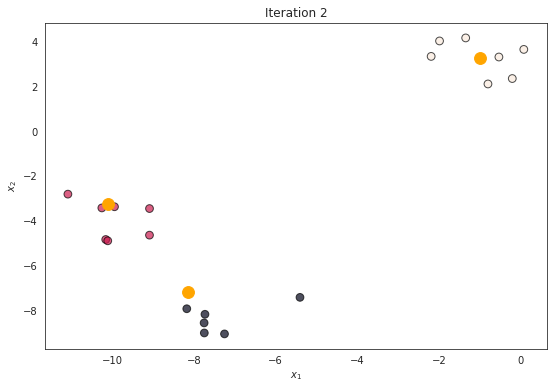

In [ ]:
plot_clusters(X, centers, A, title='Iteration 2')

# Update step
Move cluster centers to the middle (centroid) of points assigned to it.

In [ ]:
for i in range(k):
    # select out points assigned to cluster i
    X_assigned = X[A == i]

    # find the centroid of the selected points
    centers[i] = X_assigned.mean(axis=0)

# print out the new centers
print(centers)

[[ -7.3  -8.3]
 [-10.   -3.9]
 [ -1.    3.3]]


# Assignment step

Repeat the distance calculation and assignment step.

In [ ]:
# Compute new distances and assignments
D = np.zeros((N, k))
for i in range(k):
    c = centers[i]
    D[:, i] = np.sum((X - c)**2, axis=1) 
A = np.argmin(D, axis=1)


In [ ]:
print(A)

[0 0 2 1 1 1 0 1 2 1 2 2 2 0 0 1 2 2 1 0]


We see from comparing the above to the previous step that **the assignments have not changed**. This means that the algorithm has **conveged**. The final cluster centers and assignments are shown below.

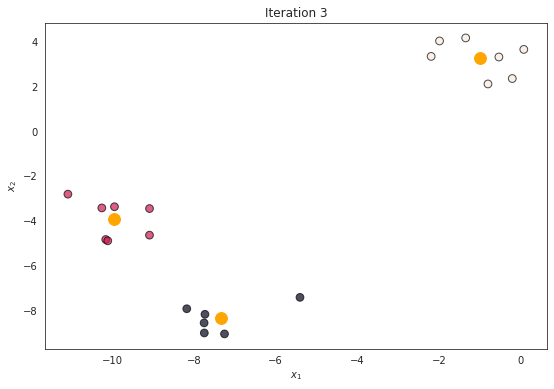

In [ ]:
plot_clusters(X, centers, A, title='Iteration 3')